**Lending Club Loan Analysis**

** Company information: **

Lending Club is a C to C lending company located at US. The investor provide funds for potential borrowers to earn a profit depending on the risk they take(e.g the borrowers credit score). Detailed info can be fund at : 
https://www.lendingclub.com

In this section, I am going to check the general information and features about the loan data from lending club 
1. exploration the data
2. check the distribution of each feature
3. get a general idea about the features related with loan amnt and other parameters

In [3]:
# load the useful package 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plotly visualization 
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

% matplotlib inline


** Load the data from csv file and check the feature info**
Note1: can not load the data using"../inputData/loan.csv"

In [10]:
df = pd.read_csv('inputData/loan.csv',low_memory = False)
df_org = df.copy()
print('data size is :', df.shape)
df.info()
df.head()

data size is : (887379, 74)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
row,col = df.shape
for i in range(0,col,10): 
    print(df.iloc[:,i:i+10].head())


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade  
0     10.65       162.87     B        B2  
1     15.27        59.83     C        C4  
2     15.96        84.33     C        C5  
3     13.49       339.31     C        C1  
4     12.69        67.79     B        B5  
                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0 

In [67]:
# check whether has the duplicate the id and memeber id 
print(len(df.id.unique()))
print(len(df.member_id.unique()))

887379
887379


There is no duplicate loan in the data

From the previous part, we can see some columns does not have any record, I decide to drop these non-recorded column with all NAN

In [82]:
# check the feature with NAN and set a threshold for the NAN number 
featureCount =  df.isnull().sum().to_dict()
#print(featureCount)
threshold = int(len(df)*0.90)
#print(threshold)
nanfeature = []
for i, j in featureCount.items():
    #print(i,j)
    if j >= threshold:
        nanfeature.append(i)
print('usless feature number is', len(nanfeature))
#print(nanfeature)

usless feature number is 17


For the purpuse of this study, I delete the columns in which 90% of contents are empty(NAN)

In [102]:
# clean the data 
df_loan = df.drop(nanfeature,axis = 1)
# check the size again
print('data size after cleaning the NAN is:', df_new.shape)
print(df_loan.head(2))

data size after cleaning the NAN is: (887379, 57)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   

   int_rate  installment grade sub_grade    ...      \
0     10.65       162.87     B        B2    ...       
1     15.27        59.83     C        C4    ...       

  collections_12_mths_ex_med mths_since_last_major_derog policy_code  \
0                        0.0                         NaN         1.0   
1                        0.0                         NaN         1.0   

   application_type acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim  \
0        INDIVIDUAL            0.0          NaN         NaN              NaN   
1        INDIVIDUAL            0.0          NaN         NaN              NaN   

  issue_month issue_year  
0         Dec       2011  
1         Dec       2011  

[2 rows x

** summary**

From the above exploration of the data, we can see that:

1. The data have 887379 records with 74 features in each records

2. There are 17 features that 90% of records does not have useful info. therefore we delay these features and shrink the feature size from 74 to 57


# Data exploration 
In this part, I will start exploring the loan data. There are several key factors we have to pay more attentions on. Our target is to check whether the loan is worth to invest. The most important thing that we care is whether the borrower will pay the money back.  In order to get a details understanding, I will analyze the data from the following aspect 
1. Loan mount 
how the loan mount change at different group 
   

11 precent of the loan do not get fully found


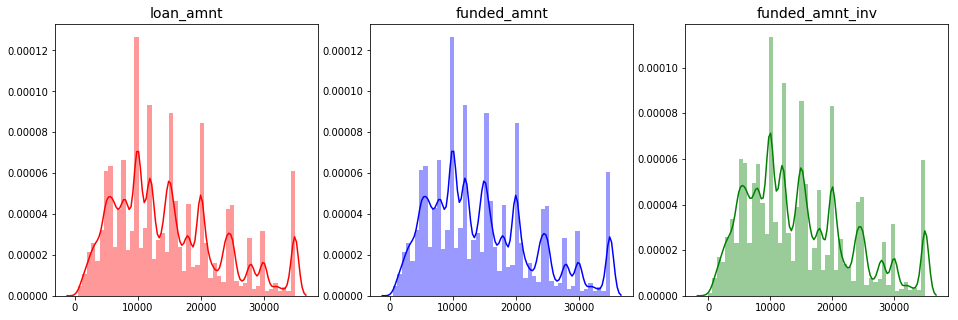

In [103]:
fig, ax  = plt.subplots(1,3,figsize = (16,5))
amountlist = ['loan_amnt','funded_amnt','funded_amnt_inv']
colorF = ['red','blue','green']
for i in range(0,3):
    sns.distplot(df_loan[amountlist[i]].values,ax = ax[i],color = colorF[i])
    title = amountlist[i]
    ax[i].set_title(title,fontsize = 14)

# check how many percent of the loan does not get fully found
precent = (len(df_loan[df_loan['loan_amnt']> df_loan['funded_amnt_inv']])/len(df_loan)) *100
print('%d precent of the loan do not get fully found'%precent)

we can see that the mean of the loan amnt is around 10000

Text(0,0.5,'Average loan amount issued')

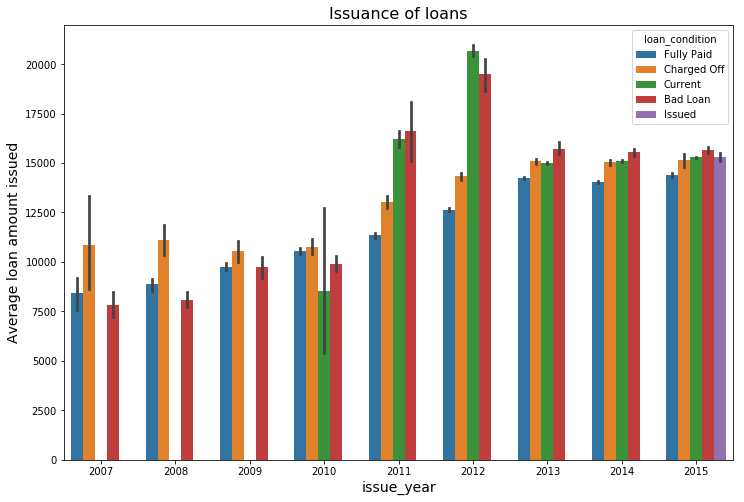

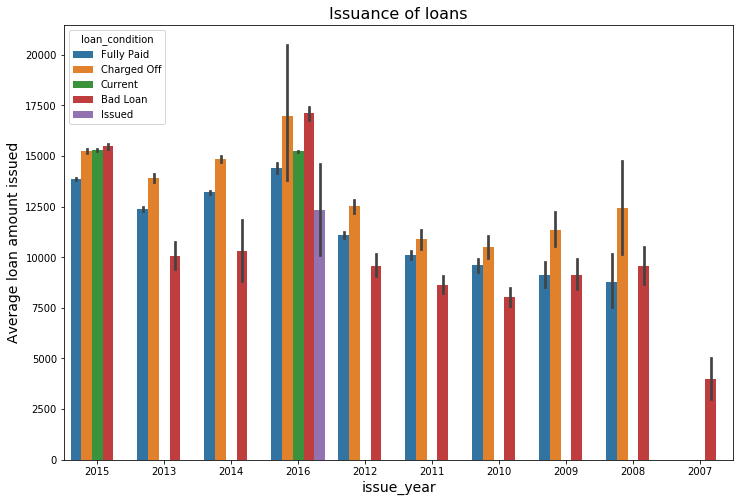

In [139]:
# check the loan date 
import re
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-',1).str
df_loan['last_pymnt_month'], df_loan['last_pymnt_year'] = df_loan['last_pymnt_d'].str.split('-',1).str
# plot the issue loan over the years
plt.figure(figsize = (12,8))
g = sns.barplot(x= 'issue_year',y = 'loan_amnt',data = df_loan,hue = 'loan_condition',palette = 'tab10')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('Average loan amount issued',fontsize = 14)
# amount over the last pymnt year
plt.figure(figsize = (12,8))
g = sns.barplot(x= 'last_pymnt_year',y = 'loan_amnt',data = df_loan,hue = 'loan_condition',palette = 'tab10')
g.set_title('Issuance of loans',fontsize = 16)
g.set_xlabel('issue_year',fontsize = 14)
g.set_ylabel('Average loan amount issued',fontsize = 14)

In [106]:

def barplotFun(xinput, yinput, title = None,df):
    plt.figure(figsize = (14,8))
    g = sns.barplot(xinput,yinput ,data = df,palette = 'tab10')
    g.set_title(title,fontsize = 16)
    g.set_xlabel(xinput,fontsize = 14)
    g.set_ylabel(yinput,fontsize = 14)  

SyntaxError: non-default argument follows default argument (<ipython-input-106-e14ead0029cd>, line 2)

In [98]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Current               601779
Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
NMCP Fully Paid         1988
Default                 1219
NMCP Charged Off         761
Name: loan_status, dtype: int64


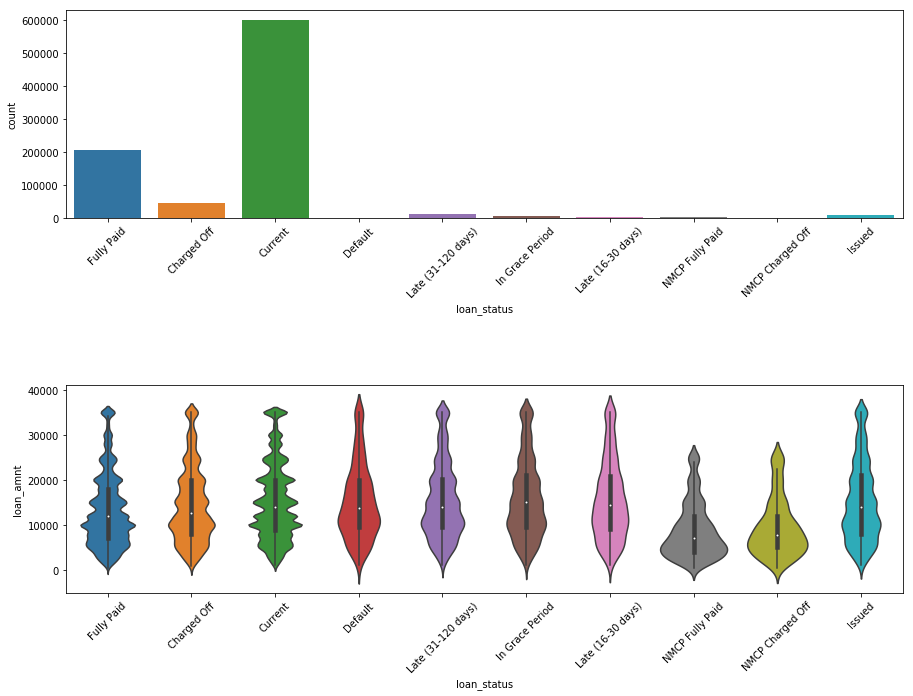

In [143]:
# type of loan
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'
print(df.loan_status.value_counts())
fig, ax =plt.subplots(2,1,figsize=(15,12))
plt.subplots_adjust(hspace = 0.8, top = 0.8)

g0 = sns.countplot(x="loan_status", data=df_loan,ax=ax[0])
g0.set_xticklabels(g0.get_xticklabels(),rotation=45)
g2 = sns.violinplot(x="loan_status", y="loan_amnt", data=df_loan,ax=ax[1])
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.show()

In [117]:
# group the loan as bad loan and good loan and current loan
bad_loan = ["Charged off","Default","NMCP Fully Paid","NMCP Charged Off",
            "In Grace Period","Late (16-30 days)","Late (31-120 days)"]
df_loan['loan_condition'] = np.nan
def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return status
df_loan['loan_condition'] = df_loan['loan_status'].apply(loan_condition)

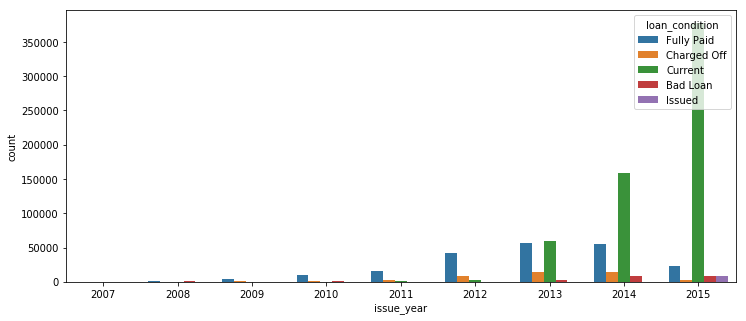

In [141]:
# get the idea about how the loan status change over the year
plt.figure(figsize = (12,5))
ax = sns.countplot(x='issue_year', hue="loan_condition", data=df_loan)
#plt.figure(figsize = (12,5))
#ax = sns.countplot(x='last_pymnt_year', hue="loan_condition", data=df_loan)
#ax.set_legend(loc = 'upright')

2007    1.708738
2008    0.631939
2009    0.137069
2010    0.100518
2011    0.005647
2012    0.008679
2013    0.057788
2014    0.153090
2015    0.405674
Name: issue_year, dtype: float64


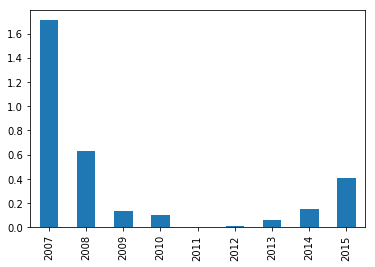

In [137]:
# calcuate the bad loan rate over the year 
bad_loan_year = df_loan[df_loan['loan_condition'] =='Bad Loan'].issue_year.value_counts()
fully_loan_year = df_loan[df_loan['loan_condition'] =='Fully Paid'].issue_year.value_counts()
#print(bad_loan_year)
#print(fully_loan_year)
rate = bad_loan_year/fully_loan_year
rate.plot(kind = 'bar')
print(rate)



Note: we calcuate the ratio between the Bad_Loan and Fully_charge, we can see that during the 2007 and 2008, the ratio is very high. This may cause by the economy crisis that a lot of people lost their job and were not able to pay off the loan

# loan risk assesment
In the following section, we will focus on the bad loan and fully charged data to investigate the different between them, therefore to analysis the risk of a loan

In [ ]:
# check the term VS loan status 
# check the amount VS loan status 
# check the purpose VS loan status 
# check the int_rate VS loan status
# inorder to show the precentage of the these parameter 